In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [27]:
import warnings
warnings.filterwarnings("ignore")

## Lets load in our data, we will start with HY and Manager data

In [28]:
data = pd.read_csv('Managers.csv')

In [29]:
data1 = pd.read_csv('HY_Agg.csv')

In [30]:
data.head()

,Date,Manager_A_Monthly_Return_Percent,Manager_B_Monthly_Return_Percent,Manager_C_Monthly_Return_Percent
0,01/31/2015,1.9610,1.58,2.088553
1,02/28/2015,-0.5723,-0.53,-0.896415
2,03/31/2015,0.3403,-0.14,-0.058587
3,04/30/2015,-0.4199,0.32,0.110233
4,05/31/2015,-0.5072,-0.12,0.244451


In [31]:
data1.head()

,Date,HY_Percent_Return,Agg
0,09/30/2019,0.317,-0.5325
1,08/30/2019,0.390,2.5913
2,07/31/2019,0.512,0.2201
3,06/28/2019,2.452,1.2556
4,05/31/2019,-1.271,1.7752


## Join the HY data and Manager data on the date (Prepping and cleaning data for linear regression)

In [32]:
newData = pd.merge(data, data1, on='Date', how='right') 

In [33]:
newData.head()

,Date,Manager_A_Monthly_Return_Percent,Manager_B_Monthly_Return_Percent,Manager_C_Monthly_Return_Percent,HY_Percent_Return,Agg
0,03/31/2015,0.3403,-0.14,-0.058587,-0.531,0.4644
1,04/30/2015,-0.4199,0.32,0.110233,1.199,-0.3588
2,06/30/2015,-1.3120,-0.58,-1.001936,-1.525,-1.0904
3,07/31/2015,0.8449,-0.32,-0.892478,-0.616,0.6951
4,08/31/2015,-0.5512,-0.62,-0.126473,-1.761,-0.1436


In [34]:
newData['ManagerAData'] = (newData['Manager_A_Monthly_Return_Percent'] - newData['Agg'])

In [35]:
newData['ManagerAData'].head() # Sanity check |.3403 - .4644| = .1241 so our absolute value function worked!

0   -0.1241
1   -0.0611
2   -0.2216
3    0.1498
4   -0.4076
Name: ManagerAData, dtype: float64

In [36]:
newData.head() # Adding columns to NewData with the absolute value 

,Date,Manager_A_Monthly_Return_Percent,Manager_B_Monthly_Return_Percent,Manager_C_Monthly_Return_Percent,HY_Percent_Return,Agg,ManagerAData
0,03/31/2015,0.3403,-0.14,-0.058587,-0.531,0.4644,-0.1241
1,04/30/2015,-0.4199,0.32,0.110233,1.199,-0.3588,-0.0611
2,06/30/2015,-1.3120,-0.58,-1.001936,-1.525,-1.0904,-0.2216
3,07/31/2015,0.8449,-0.32,-0.892478,-0.616,0.6951,0.1498
4,08/31/2015,-0.5512,-0.62,-0.126473,-1.761,-0.1436,-0.4076


In [37]:
newData['ManagerBData'] = (newData['Manager_B_Monthly_Return_Percent'] - newData['Agg'])

In [38]:
newData['ManagerCData'] = (newData['Manager_C_Monthly_Return_Percent'] - newData['Agg'])

In [39]:
newData['HY_Data'] = (newData['HY_Percent_Return'] - newData['Agg'])

In [40]:
newData.head()

,Date,Manager_A_Monthly_Return_Percent,Manager_B_Monthly_Return_Percent,Manager_C_Monthly_Return_Percent,HY_Percent_Return,Agg,ManagerAData,ManagerBData,ManagerCData,HY_Data
0,03/31/2015,0.3403,-0.14,-0.058587,-0.531,0.4644,-0.1241,-0.6044,-0.522987,-0.9954
1,04/30/2015,-0.4199,0.32,0.110233,1.199,-0.3588,-0.0611,0.6788,0.469033,1.5578
2,06/30/2015,-1.3120,-0.58,-1.001936,-1.525,-1.0904,-0.2216,0.5104,0.088464,-0.4346
3,07/31/2015,0.8449,-0.32,-0.892478,-0.616,0.6951,0.1498,-1.0151,-1.587578,-1.3111
4,08/31/2015,-0.5512,-0.62,-0.126473,-1.761,-0.1436,-0.4076,-0.4764,0.017127,-1.6174


## Lets do some descriptive statistics on our variables

In [41]:
newData['ManagerAData'].describe() # Manager A Returns

count    39.000000
mean     -0.051154
std       0.287523
min      -0.673900
25%      -0.217350
50%      -0.026600
75%       0.078450
max       1.043300
Name: ManagerAData, dtype: float64

In [42]:
newData['ManagerBData'].describe() # Manager B Returns

count    39.000000
mean      0.001541
std       0.517609
min      -1.025200
25%      -0.410050
50%       0.013700
75%       0.295900
max       1.505400
Name: ManagerBData, dtype: float64

In [43]:
newData['ManagerCData'].describe() # Manager C Returns

count    39.000000
mean      0.002453
std       0.739627
min      -1.587578
25%      -0.460368
50%       0.064249
75%       0.296290
max       2.586232
Name: ManagerCData, dtype: float64

In [44]:
newData['HY_Data'].describe() # HY Return

count    57.000000
mean      0.225409
std       1.733705
min      -4.029100
25%      -0.923000
50%       0.328100
75%       1.373400
max       3.612200
Name: HY_Data, dtype: float64

## Linear Regression model 

Text(0.5, 1.0, 'Diff. of Manager A & Agg. Versus HY & Agg.')

<Figure size 1080x3240 with 0 Axes>

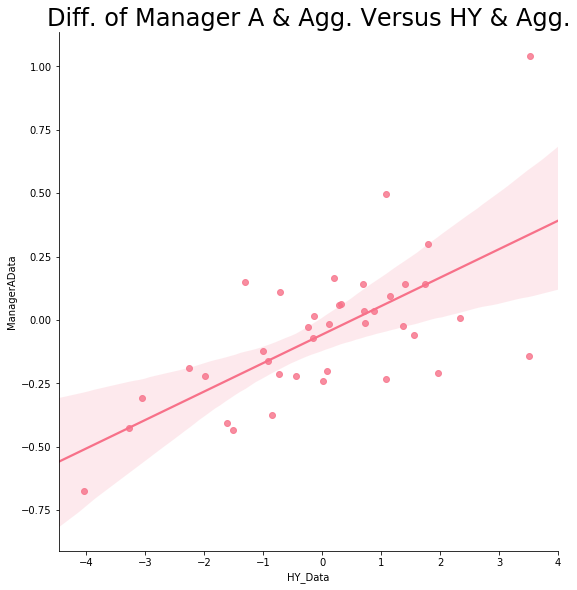

In [45]:
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('HY_Data','ManagerAData', data = newData, height=8, fit_reg=True)
plt.title('Diff. of Manager A & Agg. Versus HY & Agg.', size=24)

Text(0.5, 1.0, 'Diff of Manager B & Agg. Versus HY & Agg.')

<Figure size 1080x3240 with 0 Axes>

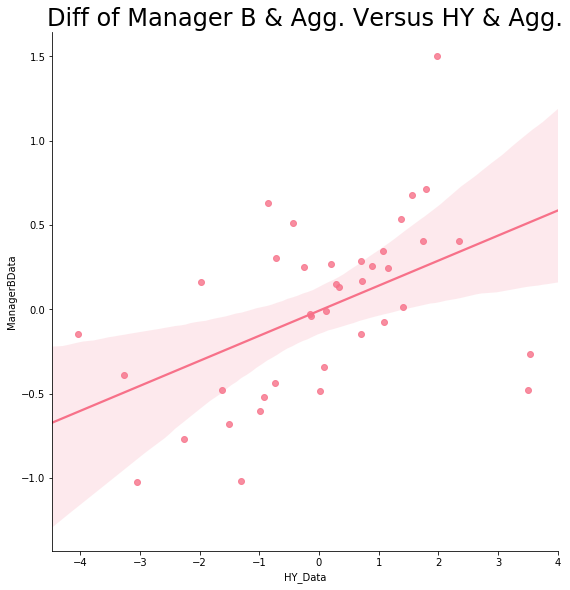

In [46]:
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('HY_Data', 'ManagerBData', data = newData, height=8, fit_reg=True)
plt.title('Diff of Manager B & Agg. Versus HY & Agg.', size=24)

Text(0.5, 1.0, 'Diff of Manager C & Agg. Versus HY & Agg.')

<Figure size 1080x3240 with 0 Axes>

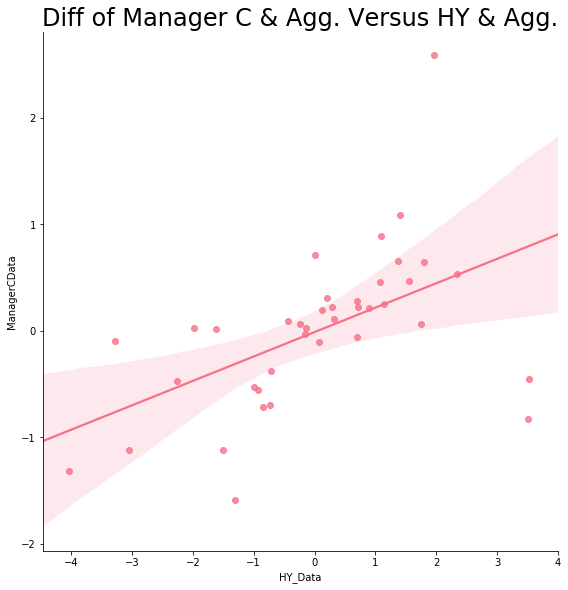

In [47]:
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('HY_Data', 'ManagerCData', data = newData, height=8, fit_reg=True)
plt.title('Diff of Manager C & Agg. Versus HY & Agg.', size=24)

Text(0.5, 1.0, 'Diff of HY & Agg. Versus HY & Agg.')

<Figure size 1080x3240 with 0 Axes>

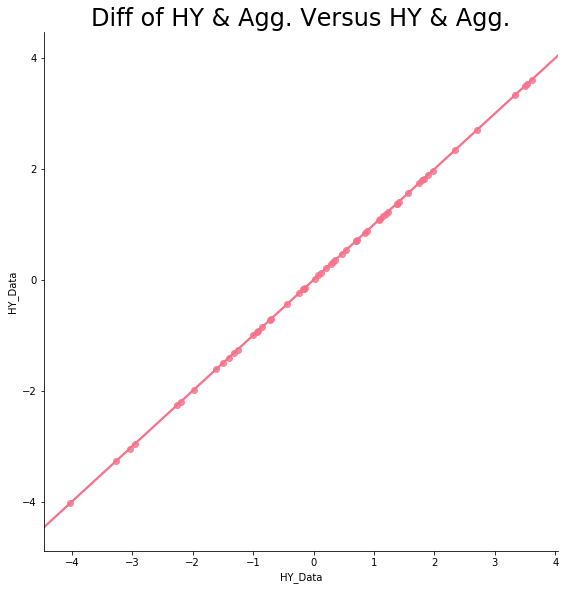

In [48]:
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('HY_Data', 'HY_Data', data = newData, height=8, fit_reg=True)
plt.title('Diff of HY & Agg. Versus HY & Agg.', size=24)

# Correlation Matrix to show which managers have most correlated return amongst the HY Index

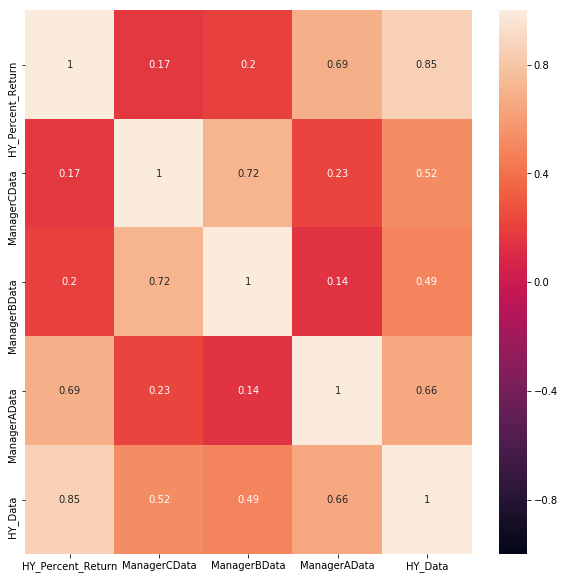

In [49]:
#Pairwise correlation between attributes
fig=plt.figure(figsize=(10, 10))
sns.heatmap(newData[['HY_Percent_Return', 'ManagerCData', 'ManagerBData', 'ManagerAData', 'HY_Data' ]].corr(), vmin = -1, vmax=1, annot=True)
plt.show()